 # PAOO5: High Value Customer Identification (Insiders)

## Planejamento da solução (IoT)

### Input

1. Problema de negocio
    * selecionar os clientes mais valiosos para integrar um programa de fidelizacao.
2. Conjunto de dados
    * Vendas de um e-commerce online, durante o periodo de um ano.

### Output

1. A indicacao das pessoas que farao parte do programa de Insiders
    - Lista: client_id|is_insider


2. Relatorio com as respostas das perguntas de negocio
- Quem sao as pessoas elegiveis para participar do programa insiders ?
    1. **Who are the people eligible to participate in the Insiders program?**
    2. **How many customers will be part of the group?**
    3. **What are the main characteristics of these customers?**
    4. **What percentage of revenue contribution comes from Insiders?**
    5. **What is this group's expected revenue for the coming months?**
    6. **What are the conditions for a person to be eligible for Insiders?**
    7. **What are the conditions for a person to be removed from Insiders?**
    8. **What is the guarantee that the Insiders program is better than the rest of the base?**
    9. **What actions can the marketing team take to increase revenue?**

### Tasks

1. **Quem são as pessoas elegíveis para participar do programa de Insiders ?**
    - O que é ser elegível ? O que é um cliente "valioso" para a empresa ?
        - Faturamento:
            - Alto Ticket Médio
            - Alto LTV
            - Baixa Recência ou Alta Frequência ( tempo entre as compras )
            - Alto Basket Size ( quantidade média de produtos comprados )
            - Baixa probabilidade de Churn
            - Previsão alta de LTV
            - Alta propensão de compra

        - Custo:
            - Baixo número de devoluções

        - Experiência:  
            - Média alta de avaliações
            
            
2. **Quantos clientes farão parte do grupo?**
    - Número de clientes
    - % em relação ao total de clients
    
    
3. **Quais as principais características desses clientes ?**
    - Escrever os principais atributos dos clientes
        - Idade
        - País
        - Salário
        
    - Escrever os principais comportamentos de compra dos clients ( métricas de negócio )
        - Vide acima
    
    
4. **Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?**
    - Calcular o faturamento total da empresa durante o ano.
    - Calcular o faturamento (%) apenas do cluster Insiders.
    
    
5. **Qual a expectativa de faturamento desse grupo para os próximos meses ?**
    - Cálculo do LTV do grupo Insiders
    - Séries Temporais ( ARMA, ARIMA, HoltWinter, etc )
    

6. **Quais as condições para uma pessoa ser elegível ao Insiders ?**
    - Qual o período de avaliação ?
    - O "desempenho" do cliente está próximo da média do cluster Insiders. 
    
    
7. **Quais as condições para uma pessoa ser removida do Insiders ?**
    - O "desempenho" do cliente não está mais próximo da média do cluster Insiders. 
    
    
8. **Qual a garantia que o programa Insiders é melhor que o restante da base ?**
    - Teste de Hipóteses
    - Teste A/B
    
    
9. **Quais ações o time de marketing pode realizar para aumentar o faturamento?**
    - Descontos
    - Preferências de escolha
    - Produtos exclusivos

# 0 IMPORTS

In [55]:
!pip install yellowbrick

     |████████████████████████████████| 271 kB 367 kB/s eta 0:00:01
     |████████████████████████████████| 14.9 MB 601 kB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.4
    Uninstalling numpy-1.21.4:
      Successfully uninstalled numpy-1.21.4


In [56]:
import pandas as pd 
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.display import HTML
import inflection
from sklearn import cluster as c
from yellowbrick.cluster import KElbowVisualizer

## 0.1 Helper Functions

In [30]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# 0.2 Loadind dataset

In [31]:
df_raw=pd.read_csv('/home/tc0019/DS/insiders_cluster/dataset/Ecommerce.csv', encoding='unicode_escape')
df_raw=df_raw.drop( columns = ['Unnamed: 8'], axis=1)
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# 1.0 Descricao dos dados

In [32]:
df1=df_raw.copy()

## 1.1 Rename columns

In [33]:
cols_old=['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country']

snakecase = lambda x: inflection.underscore(x)

cols_new = list( map( snakecase, cols_old ) )

df1.columns=cols_new

df1.sample()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
122581,546884,22189,CREAM HEART CARD HOLDER,1,15-Mar-17,8.29,NaN,United Kingdom


## 1.2. Data Dimensions

In [34]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 541909
Number of Cols: 8


## 1.3. Data Types

In [35]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.4. Check NA

In [36]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

### 1.4.1 Remove NA

In [37]:
df1 = df1.dropna(subset=['description', 'customer_id'])
print('Removed data: {:.2f}'.format(1-(df1.shape[0]/df_raw.shape[0])))

Removed data: 0.25


In [38]:
df1.isna().sum()


invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

In [39]:
df1.shape

(406829, 8)

## 1.5. Descriptive Statistics

### 1.5.1. Numerical Atributes

## 1.6 Change dtypes

In [40]:
# invoice date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')


# 2.0 Feature Engineering

In [41]:
df2=df1.copy()

In [42]:
# data reference
df_ref=df2.drop(['invoice_no', 'stock_code', 'description',
         'quantity', 'invoice_date', 'unit_price', 'country'], axis=1).drop_duplicates(ignore_index=True)

df_ref.head()

,customer_id
0,17850.0
1,13047.0
2,12583.0
3,13748.0
4,15100.0


In [43]:
# Gross revenue (quantity * price)
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

# Monetary 
df_monetary=df2[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref=pd.merge(df_ref, df_monetary, on='customer_id', how='left')

# Recency - last day purchase
df_recency=df2[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max()-df_recency['invoice_date']).dt.days
df_recency=df_recency[['customer_id','recency_days']].groupby('customer_id').sum().reset_index()
df_ref=pd.merge(df_ref, df_recency, on='customer_id', how='left')

# Frequency
df_freq=df2[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_ref=pd.merge(df_ref,df_freq, on='customer_id', how='left')
df_ref.isna().sum()

customer_id      0
gross_revenue    0
recency_days     0
invoice_no       0
dtype: int64

In [44]:
df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no
0,17850.0,5288.63,302,35
1,13047.0,3079.10,31,18
2,12583.0,7187.34,2,18
3,13748.0,948.25,95,5
4,15100.0,635.10,330,6


# 3.0 Filtragem de variaveis

In [45]:
df3=df_ref.copy()

# 4.0 EDA

In [46]:
df4=df3.copy()


# 5.0 Data preparation

In [47]:
df5=df4.copy()


# 6.0 Feature Selection

In [48]:
df6=df5.copy()


# 7.0 Hyperparameter fine tuning

In [49]:
df7=df6.copy()
X = df6.drop(columns='customer_id')
clusters = [2, 3, 4, 5, 6]

## 7.1 Within-Cluster Sum of Square (WSS)

Text(0.5, 1.0, 'WSS vs K')

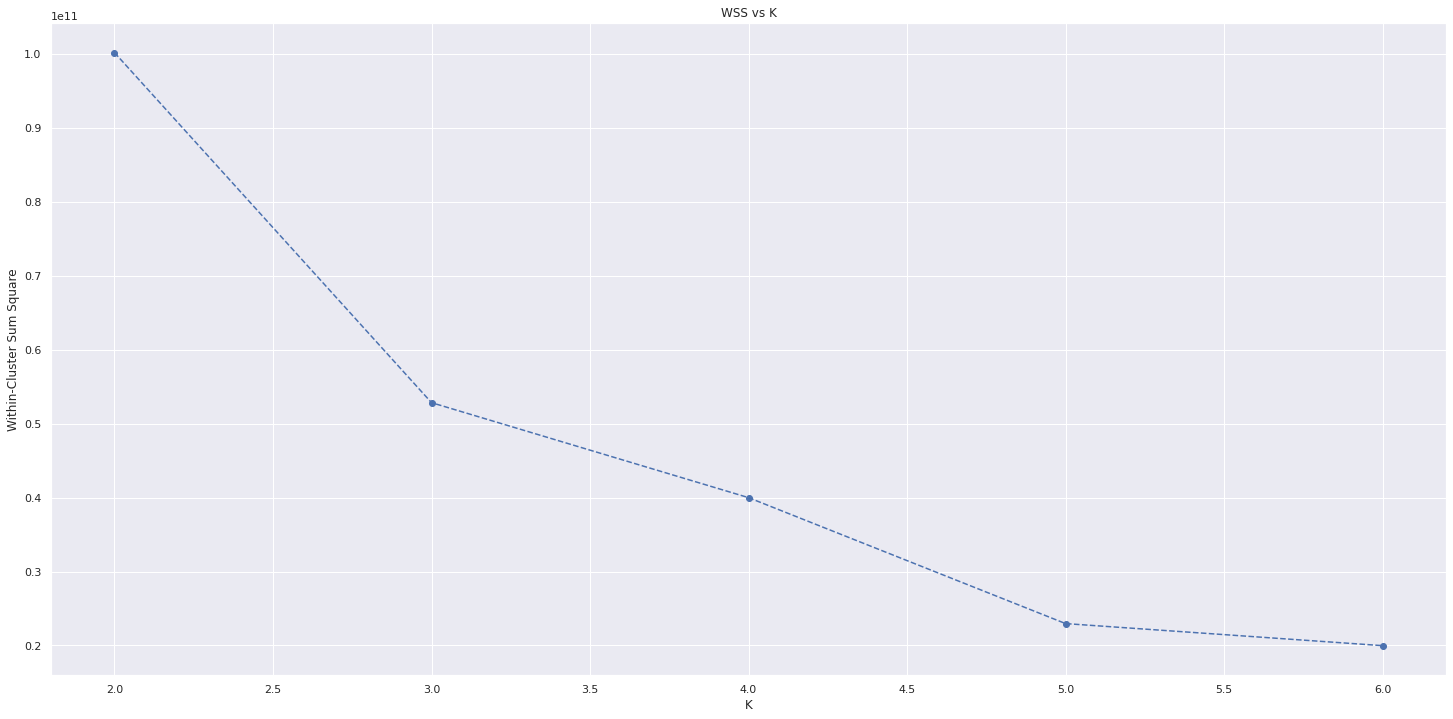

In [50]:
wss = []
for k in clusters:
    # model definition
    kmeans=c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42 )

    # model Training
    kmeans.fit(X)

    # validation
    wss.append( kmeans.inertia_)

# plot wss elbow method
plt.plot(clusters, wss, linestyle='--', marker='o', color='b')
plt.xlabel('K');
plt.ylabel('Within-Cluster Sum Square');
plt.title('WSS vs K')

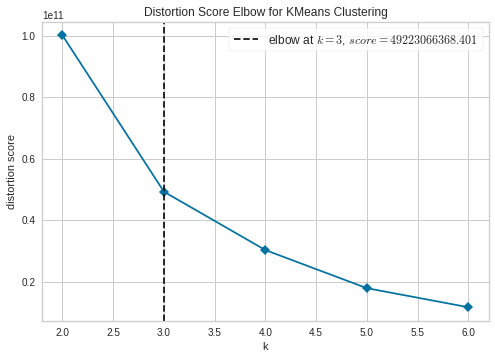

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, timings=False )
kmeans.fit(X)
kmeans.show()

## 7.2 Sillhouette Score

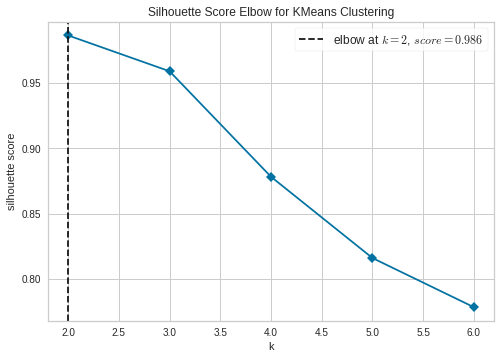

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [59]:
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, metric='silhouette', timings=False )
kmeans.fit(X)
kmeans.show()

# 8.0 Model Training

In [52]:
df8=df7.copy()


# 9.0 Cluster Analysis

In [53]:
df9=df8.copy()


# 10.0 Deploy to production

In [54]:
df10=df9.copy()
